# SocialStock Data Analysis

This notebook has the following objectives:

1) find equilibrium time in IncDistr vs time plot <br>
2) visualize the social network each day of the simulation <br>
3) show histogram about opinion sum and companies' indexes <br>
4) find equilibrium time in opinions vs time plot

In [200]:
# SETTING THE PARAMETERS
companies=2
op_range=10
users=100

In [208]:
# IMPORTING LIBRARIES
import networkx as nx
import pandas as pd

import numpy as np
#from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

In [202]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1) Equilibrium time in IncDistr vs time plot 

In [203]:
# IMPORTING DATASET FOR 1) AND 2)
data = "/Users/Cinus/University/Magistrale_Sistemi_Complessi_Torino/MAS/GitHub/SocialStock/data/c"+str(companies)+"r"+str(op_range)+"n"+str(users)

file = open( data + "Int.txt")
tit = file.readline()

X = []
nn = {}

for l in file.readlines() :
    line = l.split(":")
    line[0:4] = [int(i) for i in line[0:4]]
    line[4] = [int(i) for i in line[4][1:-2].split(", ")]
    X.append(line[0:4])
    nn[ (line[0],line[1]) ] = line[4]

X = np.array(X)
X = pd.DataFrame(X) 

tit = tit.split("-")[:-1]
X.columns = tit
X.sort_values(["uDays" , "ind"])

X1 = X[X.uDays==1]

uDays = int(X.shape[0]/users)
Deg = np.array(X1.sort_values("ind").deg)

##nearest_neighbours[4]

#dizionario dei nearest neighbours nel quarto giorno
#si hanno tante key-value pairs quante gli user

# key : indice dello user
# value : lista con gli indici della callout list 
nearest_neighbours = {}

for d in range(uDays) :
    nearest_neighbours[d+1] = {}
    for u in range(users) :
        nearest_neighbours[d+1][u] = nn[(d+1,u)]

Text(0,0.5,'$IncDistr$')

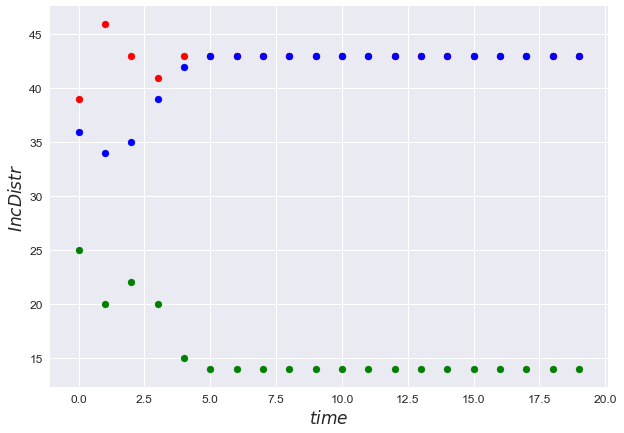

In [209]:
IncDistr = []
for d in range(uDays):
    IncDistr.append(np.unique(X[X.uDays==d+1].incl, return_counts= True)[1])
IncDistr = np.array(IncDistr)

plt.figure(figsize=(10,7))
plt.scatter(y=IncDistr[:,0] , x=range(uDays) , color = "red" )
plt.scatter(y=IncDistr[:,1] , x=range(uDays) , color = "green")
plt.scatter(y=IncDistr[:,2] , x=range(uDays) , color = "blue")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$time$', fontsize=17)
plt.ylabel('$IncDistr$', fontsize=17)

In [210]:
t=0
IncDistr_t=[]
for i in IncDistr:
    if( np.array_equal(i,IncDistr_t) ):
        print('Equilibrium time is '+ str(t))
        break
    else: 
        IncDistr_t=[j for j in i]
        t+=1

Equilibrium time is 6


## 2) Visualize Network of Day 1

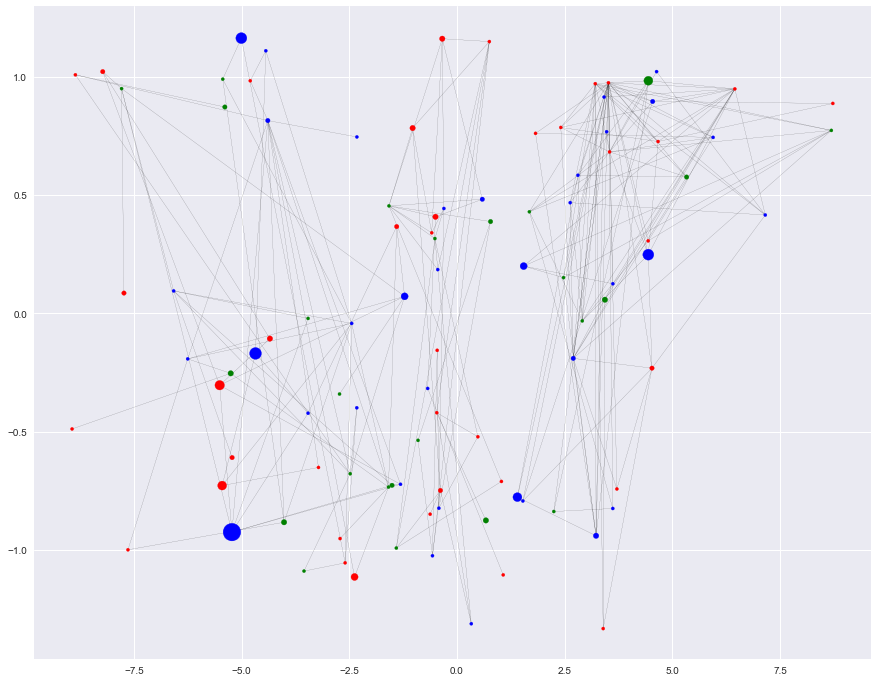

In [211]:
def Graphday(X , day) :
    G1 = nx.Graph()
    X1 = X[X.uDays == day]
    X1 = X1.sort_values(["ind"])

    for u in range(users) : 
            for n in nearest_neighbours[day][u] :
                G1.add_edge(u,n)

    pos1 = nx.circular_layout(G1)
    incols = np.array(["red","green","blue"])

    m = np.sum(O[day] , axis =1)
    for i in range(users) :
        pos1[i][0] = m[i] + np.random.normal(scale =0.2)
        pos1[i][1] += np.random.normal(scale =0.2)

    plt.figure(1,figsize=(15,12)) 

    nx.draw_networkx(G1,
                     node_size= X1.deg*10, 
                     pos = pos1,
                     node_color= incols[np.array(X1.incl +1)], 
                     with_labels=False,
                     width=0.1)
    
Graphday(X,1)
plt.show()

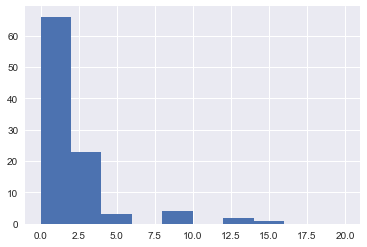

In [212]:
# DEGREE DISTRIBUTION
plt.hist(X1.deg, range=(0,20))
plt.show()

## 4) Equilibrium time in sum(opinions) vs time plot 

In [267]:
# OPINION MATRIX
data = "/Users/Cinus/University/Magistrale_Sistemi_Complessi_Torino/MAS/GitHub/SocialStock/data/c"+str(companies)+"r"+str(op_range)+"n"+str(users)

file = open( data + ".txt")
tit = file.readline()

Op = []

for l in file.readlines() :
    line = (l.split(","))
    line[companies-1] = line[companies-1][:-2]
    line = [float(i) for i in line]
    Op.append(line)
    
# O is a dictionary with: (key : day) (value : opinion matrix of that day)    
O = {}
index = 0
for d in range(uDays) :
    O[d+1] = np.array(Op[index:(index + users)])
    index = index + users

In [312]:
# defining dictiorary time: sum of opinions at that time
O_t={}
for i in O.keys():
    # list of vector to sum
    vec_list=[O[i][j] for j in range(users)]
    # summing vectors
    O_t[i] = np.sum( vec_list, axis=0 )
O_t

{1: array([-17., -24.]),
 2: array([  5., -49.]),
 3: array([ 39., -43.]),
 4: array([54., -6.]),
 5: array([75., 17.]),
 6: array([97., 15.]),
 7: array([91., 27.]),
 8: array([82., 23.]),
 9: array([76., 28.]),
 10: array([69., 24.]),
 11: array([55., 40.]),
 12: array([62., 46.]),
 13: array([57., 46.]),
 14: array([47., 36.]),
 15: array([39., 36.]),
 16: array([37., 36.]),
 17: array([41., 36.]),
 18: array([47., 26.]),
 19: array([51., 32.]),
 20: array([53., 36.])}

Text(0,0.5,'$Opinions$')

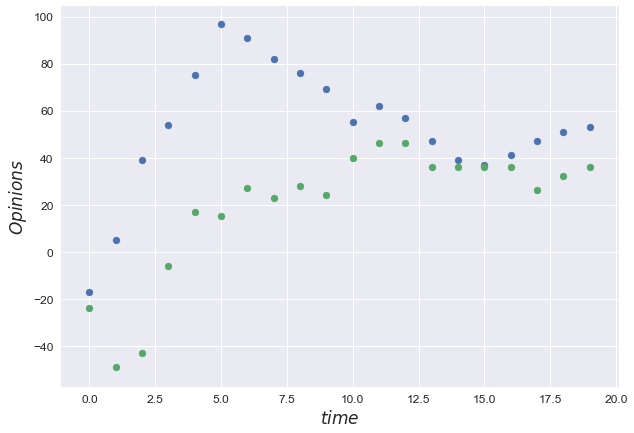

In [313]:
plt.figure(figsize=(10,7))
for i in range(companies):
    Y_comp=[O_t[j+1][i] for j in range(uDays)]
    plt.scatter( y=Y_comp , x=range(uDays) )

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('$time$', fontsize=17)
plt.ylabel('$Opinions$', fontsize=17)

In [315]:
t=0
for i in range(len(Y_comp)):
    #print(Y_comp[i])
    if( np.array_equal(Y_comp[i],Y_comp[i+6])):
        print('Equilibrium time is '+ str(t))
        break
    else: 
        t+=1

Equilibrium time is 13


##### 3) Histrogram opinions - companies

Text(0.5,0,'$Company-index$')

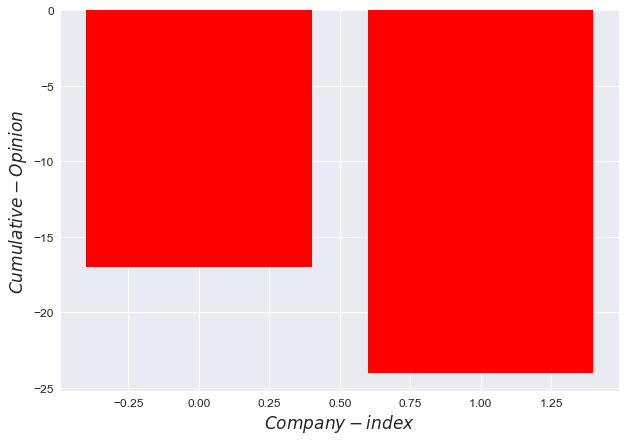

In [354]:
# CHOOSE DAY
day=1
plt.figure(figsize=(10,7))

colors=[]
for i in O_t[day]:
    if(i<0): colors.append('red')
    if(i>0): colors.append('blue')
        
# histogram
bar([i for i in range(companies)], list(O_t[day]), color=np.array(colors))

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('$Cumulative-Opinion$', fontsize=17)
plt.xlabel('$Company-index$', fontsize=17)